# Preprocessing Data

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import xgboost as xgb
!pip install --quiet optuna
import optuna


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.0 MB/s eta 0:00:00


In [2]:
'''# Download the .zip file
url = 'https://archive.ics.uci.edu/static/public/296/diabetes+130-us+hospitals+for+years+1999-2008.zip'
r = requests.get(url)
with open('datasets.zip', 'wb') as f:
    f.write(r.content)

# Extract the diabetic dataset
with zipfile.ZipFile('datasets.zip', 'r') as zip_ref:
    desired_file = 'diabetic_data.csv'
    zip_ref.extract(desired_file)

# Read the dataset into a DataFrame
df = pd.read_csv(desired_file)

# Print the DataFrame to verify
print(df)

# Optional: Delete the downloaded files
# os.remove('datasets.zip')
# os.remove(desired_file)
'''

"# Download the .zip file\nurl = 'https://archive.ics.uci.edu/static/public/296/diabetes+130-us+hospitals+for+years+1999-2008.zip'\nr = requests.get(url)\nwith open('datasets.zip', 'wb') as f:\n    f.write(r.content)\n\n# Extract the diabetic dataset\nwith zipfile.ZipFile('datasets.zip', 'r') as zip_ref:\n    desired_file = 'diabetic_data.csv'\n    zip_ref.extract(desired_file)\n\n# Read the dataset into a DataFrame\ndf = pd.read_csv(desired_file)\n\n# Print the DataFrame to verify\nprint(df)\n\n# Optional: Delete the downloaded files\n# os.remove('datasets.zip')\n# os.remove(desired_file)\n"

In [3]:
# Read the file
# workdir = os.getcwd()  # Get the current working directory
# file_path = os.path.join(workdir, './dataset/diabetic_data.csv')  # Join the workdir and filename
file_path = 'https://archive.ics.uci.edu/static/public/296/data.csv'
original_df = pd.read_csv(file_path)

df = original_df.copy(deep=True)

<ipython-input-3-e1d3e3f8ad10>:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  original_df = pd.read_csv(file_path)


In [4]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

The columns race, age, weight, payer_code, medical_specialty has null values

In [6]:
# Reeplace nan to '?'
df.fillna('?',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

The columns 'payer_code', 'medical_specialty' by definition do not provide patient information, they will be discarded.

In [7]:
df.describe(include="all")

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,1.017660e+05,1.017660e+05,101766,101766,101766,101766,101766.000000,101766.000000,101766.000000,101766.000000,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,NaN,NaN,6,3,10,10,NaN,NaN,NaN,NaN,...,1,4,4,2,2,2,2,2,2,3
top,NaN,NaN,Caucasian,Female,[70-80),?,NaN,NaN,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
freq,NaN,NaN,76099,54708,26068,98569,NaN,NaN,NaN,NaN,...,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864
mean,1.652016e+08,5.433040e+07,NaN,NaN,NaN,NaN,2.024006,3.715642,5.754437,4.395987,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.026403e+08,3.869636e+07,NaN,NaN,NaN,NaN,1.445403,5.280166,4.064081,2.985108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.252200e+04,1.350000e+02,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,8.496119e+07,2.341322e+07,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.523890e+08,4.550514e+07,NaN,NaN,NaN,NaN,1.000000,1.000000,7.000000,4.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.302709e+08,8.754595e+07,NaN,NaN,NaN,NaN,3.000000,4.000000,7.000000,6.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleanning

In [8]:
df['weight'].unique()

array(['?', '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

In [9]:
# Function to count the repetitions of each value in a column
def count_values(df, column):
  """Counts the repetitions of each value in a column of a DataFrame.

  Args:
    df: A Pandas DataFrame.
    column: The name of the column to analyze.

  Returns:
    A Series with the values as index and their repetitions as values.
  """
  repetitions = df[column].value_counts()
  return repetitions


repetitions = count_values(df, "weight")

print(repetitions)


?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64


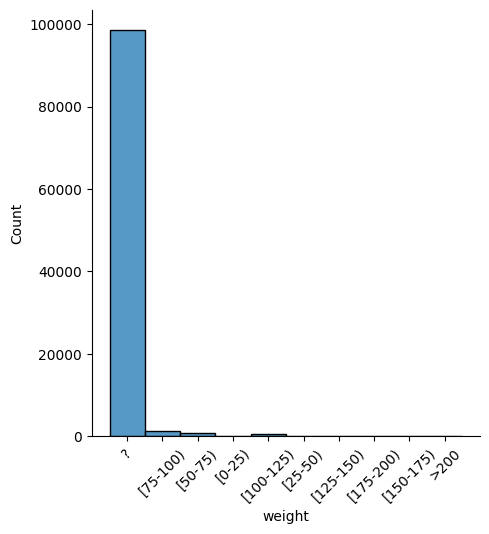

In [10]:
# Function to plot the distribution of a column
def plot_distribution(column, df):
  """Plots the distribution of a specific column from a DataFrame.

  Args:
    column: The name of the column to plot.
    df: The pandas DataFrame containing the data.

  Returns:
    None. The function directly displays the plot.
  """

  # data = df[df[column] != "?"]  # Filter out rows with "?" in the column
  data = df  # NO Filter out rows with "?" in the column
  sns.displot(data[column], kind="hist")  # Create the distribution plot
  plt.xticks(rotation=45)  # Rotate x-labels by 45 degrees
  plt.show()  # Display the plot

plot_distribution('weight',df)


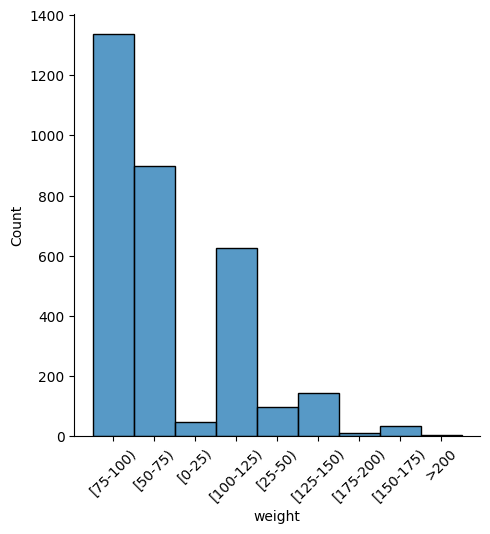

In [11]:
# Function to plot the distribution of a column
def plot_distribution(column, df):
  """Plots the distribution of a specific column from a DataFrame.

  Args:
    column: The name of the column to plot.
    df: The pandas DataFrame containing the data.

  Returns:
    None. The function directly displays the plot.
  """

  data = df[df[column] != "?"]  # Filter out rows with "?" in the column
  sns.displot(data[column], kind="hist")  # Create the distribution plot
  plt.xticks(rotation=45)  # Rotate x-labels by 45 degrees
  plt.show()  # Display the plot

plot_distribution('weight',df)


For the weight column, the relationship between the missing data and the existing data is very high, which is why the column will be discarded.

In [12]:
print(df['examide'].unique())
print(df['citoglipton'].unique())

['No']
['No']



The columns 'examide', 'citoglipton' have a single value, this does not contribute to the prediction, therefore they will be discarded.

In [13]:
# Drop features
def drop_features(df):

    df = df.drop(['weight', 'payer_code', 'medical_specialty', 'examide', 'citoglipton'], axis=1)

    # drop bad data with 3 '?' in diag
    drop_ID = set(df[(df['diag_1'] == '?') & (df['diag_2'] == '?') & (df['diag_3'] == '?')].index)

    # drop died patient data which 'discharge_disposition_id' == 11 | 19 | 20 | 21 indicates 'Expired'
    drop_ID = drop_ID.union(set(df[(df['discharge_disposition_id'] == 11) | (df['discharge_disposition_id'] == 19) | \
                                (df['discharge_disposition_id'] == 20) | (df['discharge_disposition_id'] == 21)].index))

    # drop 3 data with 'Unknown/Invalid' gender
    drop_ID = drop_ID.union(df['gender'][df['gender'] == 'Unknown/Invalid'].index)

    # create a set of indexes to drop the IDs that are not required
    new_ID = list(set(df.index) - set(drop_ID))

    df = df.iloc[new_ID]

    return df

df = drop_features(df)

In [ ]:
"""# Encode data

def encode(df):
    df['readmitted'] = df['readmitted'].replace({'>30': 1, '<30': 1, 'NO': 0}) # Encode readmitted column
    df['race'] = df['race'].replace({'Asian':0, 'AfricanAmerican':1, 'Caucasian': 2, 'Hispanic': 3, 'Other': 4, '?': 4})# Encode race column
    df['A1Cresult'] = df['A1Cresult'].replace({'None': -99, '>8': 1, '>7': 1, 'Norm': 0})# Encode A1Cresult column
    df['max_glu_serum'] = df['max_glu_serum'].replace({'>200': 1, '>300': 1, 'Norm': 0, 'None': -99})# Encode max_glu_serum column
    df['change'] = df['change'].replace({'No': 0, 'Ch': 1})# Encode change column
    df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})# Encode gender column
    df['diabetesMed'] = df['diabetesMed'].replace({'Yes': 1, 'No':0})# Encode diabetesMed column
    # Encode age column
    age_dict = {'[0-10)': 5, '[10-20)': 15, '[20-30)': 25, '[30-40)': 35, '[40-50)': 45, '[50-60)': 55, '[60-70)': 65,
            '[70-80)': 75, '[80-90)': 85, '[90-100)': 95}
    df['age'] = df['age'].replace(age_dict)
    df['age'] = df['age'].astype('int64')
    return df

df = encode(df)"""

## Encoding data

In [14]:
# encode readmitted data

df['readmitted'] = df['readmitted'].replace({'>30': 1, '<30': 1, 'NO': 0})

count_values(df,'readmitted')

0    53208
1    46902
Name: readmitted, dtype: int64

In [15]:
# encode race data
df['race'] = df['race'].replace({'Asian':0, 'AfricanAmerican':1, 'Caucasian': 2, 'Hispanic': 3, 'Other': 4, '?': 4})

count_values(df,'race')

2    74845
1    18888
4     3722
3     2024
0      631
Name: race, dtype: int64

In [16]:
#  encode A1Cresult
df['A1Cresult'] = df['A1Cresult'].replace({'None': -99, '>8': 1, '>7': 1, 'Norm': 0})

count_values(df,'A1Cresult')


-99    83234
 1     11935
 0      4941
Name: A1Cresult, dtype: int64

In [17]:
# encode max_glu_serum
df['max_glu_serum'] = df['max_glu_serum'].replace({'>200': 1, '>300': 1, 'Norm': 0, 'None': -99})

count_values(df, 'max_glu_serum')

-99    94886
 1      2651
 0      2573
Name: max_glu_serum, dtype: int64

In [18]:
# encode change
df['change'] = df['change'].replace({'No': 0, 'Ch': 1})

count_values(df,'change')


0    53669
1    46441
Name: change, dtype: int64

In [19]:
# enconde gender
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})

count_values(df,'gender')

0    53861
1    46249
Name: gender, dtype: int64

In [20]:
# encode diabetesMed
df['diabetesMed'] = df['diabetesMed'].replace({'Yes': 1, 'No':0})

count_values(df,'diabetesMed')

1    77270
0    22840
Name: diabetesMed, dtype: int64

In [21]:
# encode age
age_dict = {'[0-10)': 5, '[10-20)': 15, '[20-30)': 25, '[30-40)': 35, '[40-50)': 45, '[50-60)': 55, '[60-70)': 65,
            '[70-80)': 75, '[80-90)': 85, '[90-100)': 95}

df['age'] = df['age'].replace(age_dict)
df['age'] = df['age'].astype('int64')

count_values(df,'age')

75    25560
65    22183
55    17102
85    16706
45     9626
35     3765
95     2668
25     1650
15      690
5       160
Name: age, dtype: int64

In [22]:
#  Classify Diagnoses by ICD-9

def classify_diagnoses_by_icd9(df):
    """Classifies diagnoses by ICD-9 codes and creates additional features.

    Args:
        df (pd.DataFrame): The DataFrame containing the diagnosis columns.

    Returns:
        pd.DataFrame: The DataFrame with classified diagnoses and added features.
    """

    def classify_diag_column(column_name):
        df.loc[df[column_name].str.contains('V|E', na=False), column_name] = 0
        df[column_name] = df[column_name].replace('?', -1)
        df[column_name] = pd.to_numeric(df[column_name], errors='coerce')

        df[column_name].replace(
            to_replace=range(1, 1000),
            value=pd.cut(range(1, 1000), bins=17, labels=range(1, 18)),
            inplace=True
        )

    for column_name in ['diag_1', 'diag_2', 'diag_3']:
        classify_diag_column(column_name)

    return df

# Apply the function to classify diagnoses by ICD-9
df = classify_diagnoses_by_icd9(df)

In [23]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,2,0,5,6,25,1,1,41,...,No,No,No,No,No,No,No,0,0,0
1,149190,55629189,2,0,15,1,1,7,3,59,...,No,Up,No,No,No,No,No,1,1,1
2,64410,86047875,1,0,25,1,1,7,2,11,...,No,No,No,No,No,No,No,0,1,0
3,500364,82442376,2,1,35,1,1,7,2,44,...,No,Up,No,No,No,No,No,1,1,0
4,16680,42519267,2,1,45,1,1,7,1,51,...,No,Steady,No,No,No,No,No,1,1,0


In [24]:
# Function to encode medicines
def process_medication_data(df, medications):
    """
    Processes medication data in a DataFrame, creating columns for "Up", "Down", and total count.

    Args:
        df (pd.DataFrame): The DataFrame containing medication data.
        medications (list): A list of medication names.

    Returns:
        pd.DataFrame: The processed DataFrame with new medication columns.
    """

    for med in medications:
        df[med] = df[med].replace({
            "Up": 1, "Down": 1, "Steady": 0, "No": 0,
        }).fillna(0)

    df['num_med_taken'] = df[[med for med in medications]].sum(axis=1)
    return df

medicine = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
            'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide',
            'metformin-pioglitazone', 'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin',
            'troglitazone', 'tolbutamide', 'acetohexamide']

# apply function
df_medicine = process_medication_data(df, medicine)


In [25]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,num_med_taken
0,2278392,8222157,2,0,5,6,25,1,1,41,...,0,0,0,0,0,0,0,0,0,0
1,149190,55629189,2,0,15,1,1,7,3,59,...,1,0,0,0,0,0,1,1,1,1
2,64410,86047875,1,0,25,1,1,7,2,11,...,0,0,0,0,0,0,0,1,0,0
3,500364,82442376,2,1,35,1,1,7,2,44,...,1,0,0,0,0,0,1,1,0,1
4,16680,42519267,2,1,45,1,1,7,1,51,...,0,0,0,0,0,0,1,1,0,0


In [26]:
# Standarize numeric features
def standardize(df, numeric_cols):
    """Standardizes numeric columns in a DataFrame, preserving non-numeric values.

    Args:
        df (pd.DataFrame): The DataFrame containing the numeric columns.
        numeric_cols (list): A list of numeric column names.

    Returns:
        pd.DataFrame: The DataFrame with standardized numeric columns.
    """

    for col in numeric_cols:
        try:
            # Attempt to convert to numeric and standardize
            df[col] = pd.to_numeric(df[col])
            df[col] = (df[col] - df[col].mean()) / df[col].std(ddof=1)
        except:
            # If conversion fails, keep original values
            pass

    # Remove outliers based on z-scores (only for numeric values)
    df = df[np.abs(zscore(df[numeric_cols])) < 3]

    return df

# Apply the function
numeric_columns = ['race', 'age', 'time_in_hospital', 'num_medications', 'number_diagnoses',
                 'num_med_taken', 'number_inpatient', 'number_outpatient', 'number_emergency',
                 'num_procedures', 'num_lab_procedures']

df_numeric = standardize(df, numeric_columns)


In [27]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,num_med_taken
0,2278392,8222157,0.175078,0,-3.814395,6,25,1,-1.139563,-0.099080,...,0,0,0,0,0,0,0,0,0,-0.589412
1,149190,55629189,0.175078,0,-3.187345,1,1,7,-0.467185,0.818330,...,1,0,0,0,0,0,1,1,1,1.460334
2,64410,86047875,-1.465728,0,-2.560295,1,1,7,-0.803374,-1.628097,...,0,0,0,0,0,0,0,1,0,-0.589412
3,500364,82442376,0.175078,1,-1.933245,1,1,7,-0.803374,0.053822,...,1,0,0,0,0,0,1,1,0,1.460334
4,16680,42519267,0.175078,1,-1.306195,1,1,7,-1.139563,0.410593,...,0,0,0,0,0,0,1,1,0,-0.589412


## Export clean dataframe

In [ ]:
# Al final exportamos dataset
# df.to_csv('./dataset/final_data.csv', index=False)

# XGB Model

Set of machine learning techniques used to improve the performance of predictive models. It works by training a series of weak models (usually decision trees) sequentially, where each model focuses on correcting the errors of the previous model.

### Generate model and trainning

In [28]:
# Define target and features
features = df.drop('readmitted', axis=1)
target = df['readmitted']

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2)

# Further split training data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2)

# Define objective function
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        # Add other hyperparameters you want to optimize
    }
    model = xgb.XGBClassifier(**params)
    model.fit(X_train, Y_train, eval_set=[(X_val, Y_val)])
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(Y_val, y_pred)
    f1 = f1_score(Y_val, y_pred, average='weighted')
    return accuracy

# Define study
study = optuna.create_study(direction='maximize')

# Evaluate initial model
initial_model = xgb.XGBClassifier()
initial_model.fit(X_train, Y_train)
initial_y_pred = initial_model.predict(X_val)
initial_accuracy = accuracy_score(Y_val, initial_y_pred)
initial_f1 = f1_score(Y_val, initial_y_pred, average='weighted')

print("Initial Accuracy: ", initial_accuracy)
print("Initial F1 Score: ", initial_f1)

# Optimize hyperparameters
study.optimize(objective, n_trials=10)

# Get best hyperparameters
best_params = study.best_params

# Train model with best hyperparameters
best_model = xgb.XGBClassifier(**best_params)
best_model.fit(X_train, Y_train)

# Evaluate on test set and print results
y_pred = best_model.predict(X_test)
acc = accuracy_score(Y_test, y_pred)
mat = confusion_matrix(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred, average='weighted')
print("Accuracy: ", acc)
print("F1 score: ", f1)
print("Confusion matrix: \n", mat)
print('Overall report: \n', classification_report(Y_test, y_pred))



[I 2024-02-29 17:35:33,429] A new study created in memory with name: no-name-a483e796-0fff-4370-b6b9-091bb4b0cae4


Initial Accuracy:  0.658946185541266
Initial F1 Score:  0.6583193131990396


<ipython-input-28-4e8567860f0f>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[0]	validation_0-logloss:0.68844
[1]	validation_0-logloss:0.68632
[2]	validation_0-logloss:0.68430
[3]	validation_0-logloss:0.68239
[4]	validation_0-logloss:0.68055
[5]	validation_0-logloss:0.67878
[6]	validation_0-logloss:0.67711
[7]	validation_0-logloss:0.67548
[8]	validation_0-logloss:0.67395
[9]	validation_0-logloss:0.67246
[10]	validation_0-logloss:0.67104
[11]	validation_0-logloss:0.66968
[12]	validation_0-logloss:0.66836
[13]	validation_0-logloss:0.66706
[14]	validation_0-logloss:0.66583
[15]	validation_0-logloss:0.66467
[16]	validation_0-logloss:0.66355
[17]	validation_0-logloss:0.66248
[18]	validation_0-logloss:0.66140
[19]	validation_0-logloss:0.66043
[20]	validation_0-logloss:0.65946
[21]	validation_0-logloss:0.65853
[22]	validation_0-logloss:0.65760
[23]	validation_0-logloss:0.65671
[24]	validation_0-logloss:0.65590
[25]	validation_0-logloss:0.65508
[26]	validation_0-logloss:0.65427
[27]	validation_0-logloss:0.65351
[28]	validation_0-logloss:0.65275
[29]	validation_0-loglos

[I 2024-02-29 17:35:40,751] Trial 0 finished with value: 0.6522662005244101 and parameters: {'n_estimators': 141, 'max_depth': 5, 'learning_rate': 0.02185304282016075}. Best is trial 0 with value: 0.6522662005244101.
<ipython-input-28-4e8567860f0f>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[0]	validation_0-logloss:0.68524
[1]	validation_0-logloss:0.68038
[2]	validation_0-logloss:0.67596
[3]	validation_0-logloss:0.67188
[4]	validation_0-logloss:0.66805
[5]	validation_0-logloss:0.66472
[6]	validation_0-logloss:0.66151
[7]	validation_0-logloss:0.65865
[8]	validation_0-logloss:0.65600
[9]	validation_0-logloss:0.65350
[10]	validation_0-logloss:0.65114
[11]	validation_0-logloss:0.64896
[12]	validation_0-logloss:0.64707
[13]	validation_0-logloss:0.64524
[14]	validation_0-logloss:0.64349
[15]	validation_0-logloss:0.64186
[16]	validation_0-logloss:0.64039
[17]	validation_0-logloss:0.63896
[18]	validation_0-logloss:0.63779
[19]	validation_0-logloss:0.63647
[20]	validation_0-logloss:0.63531
[21]	validation_0-logloss:0.63422
[22]	validation_0-logloss:0.63339
[23]	validation_0-logloss:0.63250
[24]	validation_0-logloss:0.63171
[25]	validation_0-logloss:0.63096
[26]	validation_0-logloss:0.63013
[27]	validation_0-logloss:0.62933
[28]	validation_0-logloss:0.62862
[29]	validation_0-loglos

[I 2024-02-29 17:35:45,102] Trial 1 finished with value: 0.6601323511050069 and parameters: {'n_estimators': 104, 'max_depth': 9, 'learning_rate': 0.044862091832646056}. Best is trial 1 with value: 0.6601323511050069.
<ipython-input-28-4e8567860f0f>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[0]	validation_0-logloss:0.68750
[1]	validation_0-logloss:0.68455
[2]	validation_0-logloss:0.68176
[3]	validation_0-logloss:0.67917
[4]	validation_0-logloss:0.67662
[5]	validation_0-logloss:0.67433
[6]	validation_0-logloss:0.67204
[7]	validation_0-logloss:0.66997
[8]	validation_0-logloss:0.66791
[9]	validation_0-logloss:0.66589
[10]	validation_0-logloss:0.66401
[11]	validation_0-logloss:0.66226
[12]	validation_0-logloss:0.66062
[13]	validation_0-logloss:0.65895
[14]	validation_0-logloss:0.65739
[15]	validation_0-logloss:0.65590
[16]	validation_0-logloss:0.65449
[17]	validation_0-logloss:0.65320
[18]	validation_0-logloss:0.65197
[19]	validation_0-logloss:0.65074
[20]	validation_0-logloss:0.64958
[21]	validation_0-logloss:0.64852
[22]	validation_0-logloss:0.64752
[23]	validation_0-logloss:0.64651
[24]	validation_0-logloss:0.64562
[25]	validation_0-logloss:0.64466
[26]	validation_0-logloss:0.64376
[27]	validation_0-logloss:0.64297
[28]	validation_0-logloss:0.64212
[29]	validation_0-loglos

[I 2024-02-29 17:35:50,508] Trial 2 finished with value: 0.6558246972156324 and parameters: {'n_estimators': 98, 'max_depth': 7, 'learning_rate': 0.027980173948711783}. Best is trial 1 with value: 0.6601323511050069.
<ipython-input-28-4e8567860f0f>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[0]	validation_0-logloss:0.68862
[1]	validation_0-logloss:0.68666
[2]	validation_0-logloss:0.68480
[3]	validation_0-logloss:0.68298
[4]	validation_0-logloss:0.68126
[5]	validation_0-logloss:0.67957
[6]	validation_0-logloss:0.67796
[7]	validation_0-logloss:0.67638
[8]	validation_0-logloss:0.67489
[9]	validation_0-logloss:0.67342
[10]	validation_0-logloss:0.67201
[11]	validation_0-logloss:0.67060
[12]	validation_0-logloss:0.66920
[13]	validation_0-logloss:0.66788
[14]	validation_0-logloss:0.66663
[15]	validation_0-logloss:0.66540
[16]	validation_0-logloss:0.66420
[17]	validation_0-logloss:0.66305
[18]	validation_0-logloss:0.66195
[19]	validation_0-logloss:0.66087
[20]	validation_0-logloss:0.65980
[21]	validation_0-logloss:0.65877
[22]	validation_0-logloss:0.65778
[23]	validation_0-logloss:0.65681
[24]	validation_0-logloss:0.65587
[25]	validation_0-logloss:0.65495
[26]	validation_0-logloss:0.65407
[27]	validation_0-logloss:0.65329
[28]	validation_0-logloss:0.65245
[29]	validation_0-loglos

[I 2024-02-29 17:35:53,734] Trial 3 finished with value: 0.6546385316518917 and parameters: {'n_estimators': 85, 'max_depth': 7, 'learning_rate': 0.01796935412221085}. Best is trial 1 with value: 0.6601323511050069.
<ipython-input-28-4e8567860f0f>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[0]	validation_0-logloss:0.68762
[1]	validation_0-logloss:0.68478
[2]	validation_0-logloss:0.68214
[3]	validation_0-logloss:0.67963
[4]	validation_0-logloss:0.67733
[5]	validation_0-logloss:0.67523
[6]	validation_0-logloss:0.67323
[7]	validation_0-logloss:0.67134
[8]	validation_0-logloss:0.66957
[9]	validation_0-logloss:0.66787
[10]	validation_0-logloss:0.66624
[11]	validation_0-logloss:0.66476
[12]	validation_0-logloss:0.66331
[13]	validation_0-logloss:0.66196
[14]	validation_0-logloss:0.66076
[15]	validation_0-logloss:0.65949
[16]	validation_0-logloss:0.65825
[17]	validation_0-logloss:0.65721
[18]	validation_0-logloss:0.65624
[19]	validation_0-logloss:0.65512
[20]	validation_0-logloss:0.65420
[21]	validation_0-logloss:0.65333
[22]	validation_0-logloss:0.65242
[23]	validation_0-logloss:0.65161
[24]	validation_0-logloss:0.65090
[25]	validation_0-logloss:0.65010
[26]	validation_0-logloss:0.64946
[27]	validation_0-logloss:0.64883
[28]	validation_0-logloss:0.64821
[29]	validation_0-loglos

[I 2024-02-29 17:35:58,020] Trial 4 finished with value: 0.6547009614184043 and parameters: {'n_estimators': 163, 'max_depth': 4, 'learning_rate': 0.033350533284329374}. Best is trial 1 with value: 0.6601323511050069.
<ipython-input-28-4e8567860f0f>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[0]	validation_0-logloss:0.68601
[1]	validation_0-logloss:0.68186
[2]	validation_0-logloss:0.67823
[3]	validation_0-logloss:0.67526
[4]	validation_0-logloss:0.67219
[5]	validation_0-logloss:0.66978
[6]	validation_0-logloss:0.66727
[7]	validation_0-logloss:0.66529
[8]	validation_0-logloss:0.66323
[9]	validation_0-logloss:0.66157
[10]	validation_0-logloss:0.66001
[11]	validation_0-logloss:0.65862
[12]	validation_0-logloss:0.65711
[13]	validation_0-logloss:0.65594
[14]	validation_0-logloss:0.65486
[15]	validation_0-logloss:0.65385
[16]	validation_0-logloss:0.65293
[17]	validation_0-logloss:0.65205
[18]	validation_0-logloss:0.65121
[19]	validation_0-logloss:0.65040
[20]	validation_0-logloss:0.64951
[21]	validation_0-logloss:0.64842
[22]	validation_0-logloss:0.64778
[23]	validation_0-logloss:0.64706
[24]	validation_0-logloss:0.64651
[25]	validation_0-logloss:0.64585
[26]	validation_0-logloss:0.64497
[27]	validation_0-logloss:0.64435
[28]	validation_0-logloss:0.64382
[29]	validation_0-loglos

[I 2024-02-29 17:36:03,701] Trial 5 finished with value: 0.6560119865151705 and parameters: {'n_estimators': 157, 'max_depth': 3, 'learning_rate': 0.058256529649782195}. Best is trial 1 with value: 0.6601323511050069.
<ipython-input-28-4e8567860f0f>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[0]	validation_0-logloss:0.68698
[1]	validation_0-logloss:0.68363
[2]	validation_0-logloss:0.68058
[3]	validation_0-logloss:0.67805
[4]	validation_0-logloss:0.67544
[5]	validation_0-logloss:0.67328
[6]	validation_0-logloss:0.67105
[7]	validation_0-logloss:0.66921
[8]	validation_0-logloss:0.66727
[9]	validation_0-logloss:0.66570
[10]	validation_0-logloss:0.66426
[11]	validation_0-logloss:0.66268
[12]	validation_0-logloss:0.66123
[13]	validation_0-logloss:0.66005
[14]	validation_0-logloss:0.65894
[15]	validation_0-logloss:0.65792
[16]	validation_0-logloss:0.65695
[17]	validation_0-logloss:0.65586
[18]	validation_0-logloss:0.65504
[19]	validation_0-logloss:0.65428
[20]	validation_0-logloss:0.65332
[21]	validation_0-logloss:0.65258
[22]	validation_0-logloss:0.65192
[23]	validation_0-logloss:0.65123
[24]	validation_0-logloss:0.65064
[25]	validation_0-logloss:0.64994
[26]	validation_0-logloss:0.64937
[27]	validation_0-logloss:0.64883
[28]	validation_0-logloss:0.64821
[29]	validation_0-loglos

[I 2024-02-29 17:36:07,617] Trial 6 finished with value: 0.6517667623923087 and parameters: {'n_estimators': 152, 'max_depth': 3, 'learning_rate': 0.04570329195295718}. Best is trial 1 with value: 0.6601323511050069.
<ipython-input-28-4e8567860f0f>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[0]	validation_0-logloss:0.68897
[1]	validation_0-logloss:0.68733
[2]	validation_0-logloss:0.68576
[3]	validation_0-logloss:0.68424
[4]	validation_0-logloss:0.68278
[5]	validation_0-logloss:0.68136
[6]	validation_0-logloss:0.67999
[7]	validation_0-logloss:0.67867
[8]	validation_0-logloss:0.67740
[9]	validation_0-logloss:0.67616
[10]	validation_0-logloss:0.67496
[11]	validation_0-logloss:0.67379
[12]	validation_0-logloss:0.67269
[13]	validation_0-logloss:0.67159
[14]	validation_0-logloss:0.67052
[15]	validation_0-logloss:0.66951
[16]	validation_0-logloss:0.66850
[17]	validation_0-logloss:0.66753
[18]	validation_0-logloss:0.66659
[19]	validation_0-logloss:0.66566
[20]	validation_0-logloss:0.66479
[21]	validation_0-logloss:0.66392
[22]	validation_0-logloss:0.66310
[23]	validation_0-logloss:0.66230
[24]	validation_0-logloss:0.66150
[25]	validation_0-logloss:0.66074
[26]	validation_0-logloss:0.66000
[27]	validation_0-logloss:0.65927
[28]	validation_0-logloss:0.65854
[29]	validation_0-loglos

[I 2024-02-29 17:36:10,362] Trial 7 finished with value: 0.64596079410663 and parameters: {'n_estimators': 85, 'max_depth': 5, 'learning_rate': 0.01661465024932882}. Best is trial 1 with value: 0.6601323511050069.
<ipython-input-28-4e8567860f0f>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[0]	validation_0-logloss:0.67990
[1]	validation_0-logloss:0.67141
[2]	validation_0-logloss:0.66412
[3]	validation_0-logloss:0.65800
[4]	validation_0-logloss:0.65271
[5]	validation_0-logloss:0.64873
[6]	validation_0-logloss:0.64523
[7]	validation_0-logloss:0.64204
[8]	validation_0-logloss:0.63964
[9]	validation_0-logloss:0.63708
[10]	validation_0-logloss:0.63502
[11]	validation_0-logloss:0.63324
[12]	validation_0-logloss:0.63165
[13]	validation_0-logloss:0.63031
[14]	validation_0-logloss:0.62907
[15]	validation_0-logloss:0.62818
[16]	validation_0-logloss:0.62712
[17]	validation_0-logloss:0.62634
[18]	validation_0-logloss:0.62554
[19]	validation_0-logloss:0.62477
[20]	validation_0-logloss:0.62423
[21]	validation_0-logloss:0.62361
[22]	validation_0-logloss:0.62299
[23]	validation_0-logloss:0.62225
[24]	validation_0-logloss:0.62168
[25]	validation_0-logloss:0.62122
[26]	validation_0-logloss:0.62076
[27]	validation_0-logloss:0.62016
[28]	validation_0-logloss:0.61991
[29]	validation_0-loglos

[I 2024-02-29 17:36:16,618] Trial 8 finished with value: 0.6611936571357223 and parameters: {'n_estimators': 136, 'max_depth': 7, 'learning_rate': 0.09960754267106393}. Best is trial 8 with value: 0.6611936571357223.
<ipython-input-28-4e8567860f0f>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[0]	validation_0-logloss:0.68777
[1]	validation_0-logloss:0.68507
[2]	validation_0-logloss:0.68250
[3]	validation_0-logloss:0.68008
[4]	validation_0-logloss:0.67784
[5]	validation_0-logloss:0.67569
[6]	validation_0-logloss:0.67366
[7]	validation_0-logloss:0.67172
[8]	validation_0-logloss:0.66991
[9]	validation_0-logloss:0.66818
[10]	validation_0-logloss:0.66652
[11]	validation_0-logloss:0.66495
[12]	validation_0-logloss:0.66349
[13]	validation_0-logloss:0.66207
[14]	validation_0-logloss:0.66072
[15]	validation_0-logloss:0.65947
[16]	validation_0-logloss:0.65825
[17]	validation_0-logloss:0.65714
[18]	validation_0-logloss:0.65597
[19]	validation_0-logloss:0.65489
[20]	validation_0-logloss:0.65387
[21]	validation_0-logloss:0.65288
[22]	validation_0-logloss:0.65194
[23]	validation_0-logloss:0.65105
[24]	validation_0-logloss:0.65013
[25]	validation_0-logloss:0.64929
[26]	validation_0-logloss:0.64850
[27]	validation_0-logloss:0.64773
[28]	validation_0-logloss:0.64701
[29]	validation_0-loglos

[I 2024-02-29 17:36:21,635] Trial 9 finished with value: 0.6566362841802972 and parameters: {'n_estimators': 173, 'max_depth': 5, 'learning_rate': 0.02861151707773688}. Best is trial 8 with value: 0.6611936571357223.


Accuracy:  0.667365897512736
F1 score:  0.666217112669808
Confusion matrix: 
 [[7555 2937]
 [3723 5807]]
Overall report: 
               precision    recall  f1-score   support

           0       0.67      0.72      0.69     10492
           1       0.66      0.61      0.64      9530

    accuracy                           0.67     20022
   macro avg       0.67      0.66      0.66     20022
weighted avg       0.67      0.67      0.67     20022



### Parameter optimization

In [29]:
best_params

{'n_estimators': 136, 'max_depth': 7, 'learning_rate': 0.09960754267106393}

In [30]:
# Print optimized model performance
print("\nOptimized Model:")
y_pred_opt = best_model.predict(X_val)
acc_opt = accuracy_score(Y_val, y_pred_opt)
f1_opt = f1_score(Y_val, y_pred_opt, average='weighted')
print("Accuracy: ", acc_opt)
print("F1 Score: ", f1_opt)


Optimized Model:
Accuracy:  0.6611936571357223
F1 Score:  0.6604737543279204


Text(0.5, 1.0, 'XGBoost -- Top 10 Important Features')

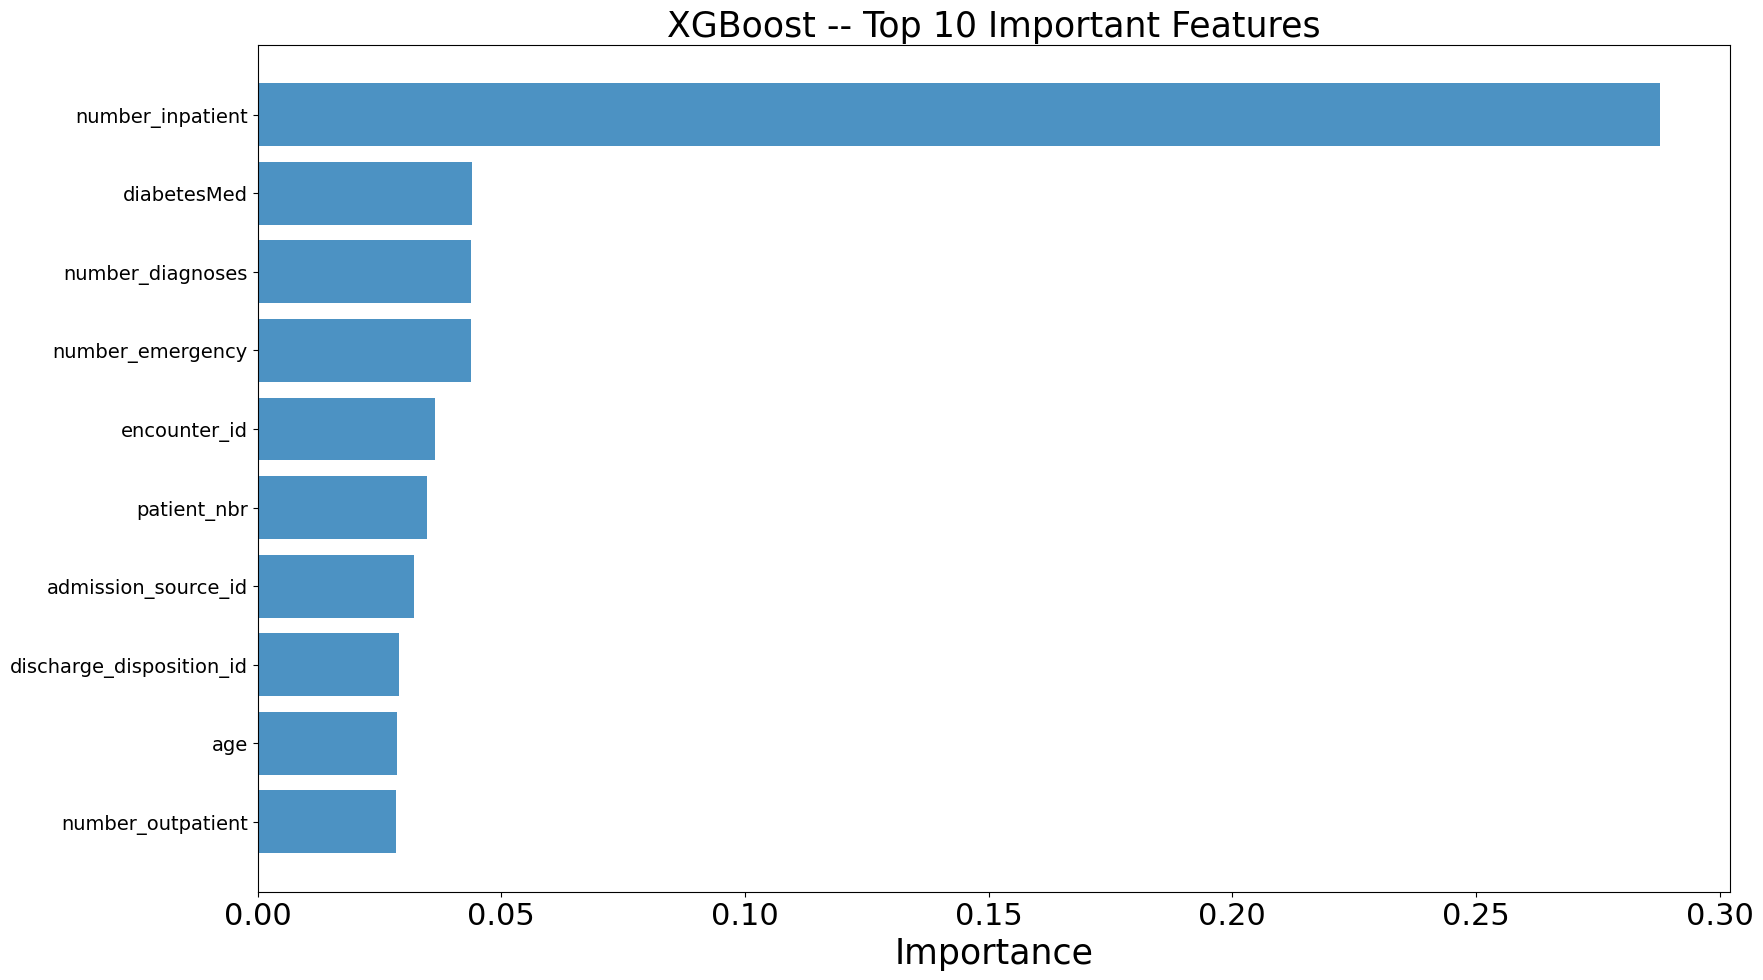

In [31]:
# Features
feature_names = X_train.columns
feature_imports = best_model.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names, feature_imports)],
                                 columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(19, 11))
plt.rc('xtick',labelsize=22)
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance', fontsize=25)
plt.title('XGBoost -- Top 10 Important Features', fontsize=25)

In [32]:
# Count occurrences of value 0
count_0 = np.count_nonzero(y_pred_opt == 0)

# Count occurrences of value 1
count_1 = np.count_nonzero(y_pred_opt == 1)

# Count occurrences of value 2
count_2 = np.count_nonzero(y_pred_opt == 2)

print("Count of 0s:", count_0)
print("Count of 1s:", count_1)
print("Count of 2s:", count_2)

Count of 0s: 8938
Count of 1s: 7080
Count of 2s: 0


In [33]:
# Assuming 'df' is your DataFrame
rows_with_readmitted_1 = df[df['readmitted'] == 1]

# Get the row numbers
row_numbers_with_readmitted_1 = rows_with_readmitted_1.index.tolist()

print("Row numbers where 'readmitted' is equal to 1:", row_numbers_with_readmitted_1)

Row numbers where 'readmitted' is equal to 1: [1, 5, 7, 10, 11, 12, 14, 16, 18, 23, 27, 28, 29, 31, 32, 33, 35, 37, 39, 40, 41, 42, 43, 46, 50, 51, 52, 53, 56, 59, 60, 61, 62, 65, 68, 69, 70, 71, 72, 74, 75, 76, 77, 79, 82, 84, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95, 96, 99, 105, 107, 109, 110, 111, 114, 116, 117, 121, 123, 125, 128, 130, 132, 135, 136, 138, 142, 143, 145, 146, 149, 151, 152, 155, 156, 157, 158, 160, 162, 165, 166, 167, 170, 172, 173, 174, 175, 176, 181, 186, 187, 192, 194, 195, 197, 199, 202, 203, 206, 209, 210, 211, 213, 214, 219, 220, 222, 223, 225, 227, 228, 231, 232, 234, 235, 236, 237, 238, 239, 240, 243, 246, 247, 252, 257, 267, 269, 274, 275, 278, 279, 280, 284, 285, 287, 288, 289, 293, 294, 296, 300, 301, 302, 304, 305, 311, 312, 314, 318, 319, 322, 327, 328, 329, 330, 332, 333, 334, 335, 339, 341, 342, 343, 344, 346, 347, 351, 352, 356, 357, 358, 359, 361, 363, 366, 367, 371, 373, 375, 376, 377, 378, 379, 384, 388, 389, 390, 391, 392, 393, 394, 397, 398, 402,

### Prediction

In [34]:
def prediction(patient_data):

    # Convert the Series to a NumPy array
    patient_data_array = np.array(patient_data)

    # Reshape the array
    patient_data_reshaped = patient_data_array.reshape(1, -1)

    # Make the prediction
    pred = best_model.predict(patient_data_reshaped)
    return pred

In [35]:
fila = df.iloc[12].drop('readmitted')

In [36]:
prediction(fila)

array([1])

# SVM Model

The SVM searches for a hyperplane that optimally separates the points of one class from the other, which may have previously been projected to a space of higher dimensionality.

This concept of "optimal separation" is where the fundamental characteristic of SVMs lies: this type of algorithms search for the hyperplane that has the maximum distance (margin) with the points that are closest to itself. This is also why SVMs are sometimes known as maximum margin classifiers. In this way, the points of the vector that are labeled with one category will be on one side of the hyperplane and the cases that are in the other category will be on the other side.

### Import libraries

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

### Test and train

### Split data

In [41]:
# Separar las características (X) y la etiqueta de clase (y)
X_svm = df[['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed',
       'num_med_taken']]
y_svm = df['readmitted']

In [42]:
# Dividir los datos en conjuntos de entrenamiento y prueba
# test_size=0.9 debido a que el modelo tarda demasiado en entrenar para valores mayores se adopta este valor para completar las pruebas
Xsvm_train, Xsvm_test, ysvm_train, ysvm_test = train_test_split(X_svm, y_svm, test_size=0.9, random_state=42)

In [ ]:
Xsvm_train

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,num_med_taken
20837,73075524,5945463,-1.465728,0,0.574956,1,3,7,-0.467185,1.429937,...,0,0,0,0,0,0,0,0,1,-0.589412
93969,342520388,88813107,0.175078,0,0.574956,1,1,7,-0.803374,0.665429,...,0,1,0,0,0,0,0,1,1,1.460334
48439,147827604,88268292,0.175078,0,1.202006,1,3,7,0.877570,1.073167,...,0,1,0,0,0,0,0,1,1,1.460334
22060,76355142,23611086,0.175078,0,-0.052094,6,25,17,-0.467185,-1.271326,...,0,1,0,0,0,0,0,1,1,1.460334
205,2674350,3845322,-1.465728,1,-0.052094,6,25,7,-0.130996,0.257691,...,0,0,0,0,0,0,0,0,1,-0.589412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6389,31757760,4830336,0.175078,1,0.574956,1,3,7,0.541381,0.410593,...,0,0,0,0,0,0,0,0,1,-0.589412
55861,160987920,43017030,0.175078,0,-0.679145,1,1,7,-0.803374,0.257691,...,0,1,0,0,0,0,0,1,1,1.460334
78155,238381452,110709918,0.175078,0,-0.052094,1,1,7,-0.803374,0.002855,...,0,1,0,0,0,0,0,1,1,1.460334
873,6867804,689355,0.175078,0,-0.052094,6,25,1,1.213759,1.124134,...,0,0,0,0,0,0,0,0,0,-0.589412


### Estandarización

In [44]:
# Normalizar los datos (saltear porque ya lo normalizamos)
scaler = StandardScaler()
Xsvm_train_scaled = scaler.fit_transform(Xsvm_train)
Xsvm_test_scaled = scaler.transform(Xsvm_test)

### Generate model

In [45]:
# Crear un modelo SVM (en este caso usa linear pero se puede intentar varias opciones de kernel)
# svm_model = SVC(kernel='linear') # Por ahora vamos a probar con el siguiente xq este modelo tardaba mucho en entrenar
svm_clf = SVC(kernel='linear')

### Train model

In [46]:
# Entrenar el modelo SVM
# svm_model.fit(X_train_scaled, y_train) # Por ahora vamos a probar con el siguiente xq este modelo tardaba mucho en entrenar
svm_clf.fit(Xsvm_train_scaled, ysvm_train)

SVC(kernel='linear')

### Prediction

In [47]:
# Predecir las etiquetas en el conjunto de prueba
# y_pred = svm_model.predict(X_test) # Por ahora vamos a probar con el siguiente xq este modelo tardaba mucho en entrenar
predicciones_svm = svm_clf.predict(Xsvm_test_scaled)

### Accuracy score

In [48]:
# Calcular la precisión del modelo
# accuracy = accuracy_score(y_test, y_pred) # Por ahora vamos a probar con el siguiente xq este modelo tardaba mucho en entrenar
# print("Precisión del modelo SVM: {:.2f}%".format(accuracy * 100)) # Por ahora vamos a probar con el siguiente xq este modelo tardaba mucho en entrenar

precision_svm = accuracy_score(ysvm_test, predicciones_svm)
print("Precisión del modelo SVM en el conjunto de datos Iris (desde CSV):", precision_svm)

Precisión del modelo SVM en el conjunto de datos Iris (desde CSV): 0.6219380903228671


### Insights
The test was carried out to train the model with 75% of the data, but it took too long to train (more than 4 hours), then the test was carried out training with only 10% of the data.

The SVM model takes too long to train, so it is not recommended to use it for this case.

# Logistic regression
This type of statistical model (also known as logit model) is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1. In logistic regression, a logit transformation is applied on the odds—that is, the probability of success divided by the probability of failure.

### Import libraries

In [49]:
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

### Split data: target and features

In [50]:
# Define target and features
features = df.drop('readmitted', axis=1)
target = df['readmitted']

# Split data into training and testing sets
Xrf_train, Xrf_test, yrf_train, yrf_test = train_test_split(features, target, test_size=0.2)

# Further split training data into training and validation sets
Xrf_train, Xrf_val, yrf_train, Yrf_val = train_test_split(Xrf_train, yrf_train, test_size=0.2)

### Objetives

The objective function is created to be able to work on the parameters of the model

In [53]:
# Define your objective function with Optuna
def objective(trial):
    # Suggest hyperparameters
    lr = trial.suggest_float("learning_rate", 0.001, 1.0)
    C = trial.suggest_uniform("C", 1e-5, 1e5)

    # Create the model with suggested hyperparameters
    model = LogisticRegression(solver="liblinear", random_state=42, C=C, penalty="l2", tol=1e-4)

    # Train the model
    model.fit(Xrf_train, yrf_train)

    # Make predictions on the validation set
    yrf_pred = model.predict(Xrf_val)

    # Evaluate model performance and return negative accuracy (Optuna minimizes)
    accuracy = accuracy_score(Yrf_val, yrf_pred)
    return accuracy

### Optimization


In [54]:
# Create Optuna study
study = optuna.create_study(direction="minimize")

# Run the optimization
study.optimize(objective, n_trials=20)

# Get the best trial and hyperparameters
best_trial = study.best_trial
best_params = best_trial.params

# Print the best hyperparameters and accuracy
print("Best hyperparameters:", best_params)
print("Best accuracy:", -best_trial.value)  # Convert negative accuracy back to positive

[I 2024-02-29 18:03:25,118] A new study created in memory with name: no-name-4bb8e619-ce3e-45ed-bcf4-4b3113627572
<ipython-input-53-f64eb6cb2ec3>:5: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  C = trial.suggest_uniform("C", 1e-5, 1e5)
[I 2024-02-29 18:03:25,309] Trial 0 finished with value: 0.5749781495817206 and parameters: {'learning_rate': 0.09040673119213333, 'C': 64192.04706469802}. Best is trial 0 with value: 0.5749781495817206.
<ipython-input-53-f64eb6cb2ec3>:5: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  C = trial.suggest_uniform("C", 1e-5, 1e5)
[I 2024-02-29 18:03:25,564] Trial 1 finished with value: 0.5749781495817206 and parameters: {'learning_rate': 0.470642285014965, 'C': 51559.2076413312

Best hyperparameters: {'learning_rate': 0.09040673119213333, 'C': 64192.04706469802}
Best accuracy: -0.5749781495817206


### Optimized  model

In [55]:
# Create a new logistic regression model with best hyperparameters
best_model = LogisticRegression(solver="liblinear", random_state=42, **{k: v for k, v in best_params.items() if k != 'learning_rate'})

### Train


In [56]:
# Train the best model on full training data
best_model.fit(Xrf_train, yrf_train)

LogisticRegression(C=64192.04706469802, random_state=42, solver='liblinear')

### Test and Evaluate

In [57]:
# Evaluate the best model on the testing set
yrf_pred = best_model.predict(Xrf_test)
accuracy = accuracy_score(yrf_test, yrf_pred)
print("Final accuracy on testing set:", accuracy)


Final accuracy on testing set: 0.5683747877334931


### Insights

La precisión del m modelo es 0,57
Es más baja que el modelo XGBoots, por lo tando descatamos el uso de este modelo
The precision of the m model is 0.57
It is lower than the XGBoots model, therefore we rule out the use of this model